## CLASSIFICATION OF KEYWORDS USING TOPIC MODELING IN GENSIM
### Moses Boudourides

In [1]:
# import time
# start_time = time.time()
import random, operator, re, string, copy, dateutil.parser, itertools, pickle, datetime, math, pandas as pd, numpy as np, matplotlib.pyplot as plt, networkx as nx
np.random.seed(2018)
from collections import Counter
from string import punctuation, digits
import nltk
nltk.download('wordnet')
from nltk.stem.porter import *
stemmer = PorterStemmer()
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet as wn
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mosesboudourides/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### The Reuters Dataset

In [2]:
from nltk.corpus import reuters

len(reuters.fileids())

10788

In [3]:
sample_size=1000
sid=random.sample([t for t in reuters.fileids() if 'training' in t],sample_size)
docs={s:reuters.raw(s) for s in sid}
docs=docs.values()

In [4]:
docs

[u'UNION CARBIDE SAYS OPERATING PROFITS FOR 4th qtr WERE 181 MLN DLRS VS LOSS THREE MLN DLRS\n\n  UNION CARBIDE SAYS OPERATING PROFITS FOR 4th qtr WERE 181 MLN DLRS VS LOSS THREE MLN DLRS\n  \n\n',
 u'MONEY MARKET FUND ASSETS ROSE 552.5 MLN DLRS IN LATEST WEEK TO 237.46 BILLION\n\n  MONEY MARKET FUND ASSETS ROSE 552.5 MLN DLRS IN LATEST WEEK TO 237.46 BILLION\n  \n\n',
 u"THAI TRADERS OPPOSE REIMPOSITION OF COFFEE QUOTAS\n  Thai coffee exporters said they hoped\n  the International Coffee Organisation (ICO) would not reimpose\n  export quotas even though this may lead to a further slump in\n  world prices.\n      Susin Suratanakaweekul, president of the Thai Coffee\n  Exporters Association, told Reuters that Thailand obtained\n  little benefit from previous ICO quotas which represented only\n  about 30 pct of its total annual exports.\n      Thailand expects increased overall coffee export revenue if\n  there are no restrictions on sales to current ICO members who\n  offer higher price

In [5]:
excluded = stopwords.words('english') + list(punctuation) 

def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return [w for w in words if w not in excluded and not w.isdigit()] #stop_words
 
vocabulary = set()
for i in docs:
    words = tokenize(i)
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(docs)
 
print VOCABULARY_SIZE, DOCUMENTS_COUNT  

12435 1000


In [6]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [7]:
documents=docs
doc_sample = documents[0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
[u'UNION', u'CARBIDE', u'SAYS', u'OPERATING', u'PROFITS', u'FOR', u'4th', u'qtr', u'WERE', u'181', u'MLN', u'DLRS', u'VS', u'LOSS', u'THREE', u'MLN', u'DLRS\n\n', u'', u'UNION', u'CARBIDE', u'SAYS', u'OPERATING', u'PROFITS', u'FOR', u'4th', u'qtr', u'WERE', u'181', u'MLN', u'DLRS', u'VS', u'LOSS', u'THREE', u'MLN', u'DLRS\n', u'', u'\n\n']


 tokenized and lemmatized document: 
[u'union', u'carbid', u'say', u'oper', u'profit', u'dlr', u'loss', u'dlr', u'union', u'carbid', u'say', u'oper', u'profit', u'dlr', u'loss', u'dlr']


In [8]:
processed_docs = [preprocess(doc) for doc in documents]
processed_docs[:10]

[[u'union',
  u'carbid',
  u'say',
  u'oper',
  u'profit',
  u'dlr',
  u'loss',
  u'dlr',
  u'union',
  u'carbid',
  u'say',
  u'oper',
  u'profit',
  u'dlr',
  u'loss',
  u'dlr'],
 [u'money',
  u'market',
  u'fund',
  u'asset',
  u'rise',
  u'dlr',
  u'latest',
  u'week',
  u'billion',
  u'money',
  u'market',
  u'fund',
  u'asset',
  u'rise',
  u'dlr',
  u'latest',
  u'week',
  u'billion'],
 [u'thai',
  u'trader',
  u'oppos',
  u'reimposit',
  u'coffe',
  u'quota',
  u'thai',
  u'coffe',
  u'export',
  u'say',
  u'hop',
  u'intern',
  u'coffe',
  u'organis',
  u'reimpos',
  u'export',
  u'quota',
  u'lead',
  u'slump',
  u'world',
  u'price',
  u'susin',
  u'presid',
  u'thai',
  u'coffe',
  u'export',
  u'associ',
  u'tell',
  u'reuter',
  u'thailand',
  u'obtain',
  u'littl',
  u'benefit',
  u'previou',
  u'quota',
  u'repres',
  u'total',
  u'annual',
  u'export',
  u'thailand',
  u'expect',
  u'increas',
  u'overal',
  u'coffe',
  u'export',
  u'revenu',
  u'restrict',
  u'sale',

In [9]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

(3326, u'fawc')
(4643, u'yellow')
(1032, u'interchang')
(2958, u'profil')
(3208, u'midafternoon')
(1351, u'authoris')
(4794, u'reshuffl')
(5492, u'lori')
(3019, u'lord')
(1439, u'digit')
(5497, u'saskatchewan')


In [10]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [11]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
# bow_corpus[43]

### Topic Modeling

In [12]:
nt=6
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=nt, id2word=dictionary, passes=2, workers=2)

In [13]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.018*"price" + 0.015*"year" + 0.014*"group" + 0.014*"compani" + 0.013*"stock" + 0.010*"februari" + 0.010*"april" + 0.008*"share" + 0.008*"export" + 0.008*"rise"
Topic: 1 
Words: 0.038*"bank" + 0.025*"market" + 0.015*"dollar" + 0.014*"year" + 0.014*"export" + 0.014*"billion" + 0.014*"trade" + 0.012*"mark" + 0.011*"money" + 0.010*"rise"
Topic: 2 
Words: 0.043*"profit" + 0.028*"bank" + 0.024*"tonn" + 0.023*"loss" + 0.018*"dlr" + 0.013*"year" + 0.013*"compani" + 0.013*"rev" + 0.012*"sell" + 0.010*"rate"
Topic: 3 
Words: 0.025*"trade" + 0.017*"dlr" + 0.016*"compani" + 0.014*"year" + 0.011*"billion" + 0.010*"market" + 0.009*"export" + 0.008*"expect" + 0.008*"tell" + 0.007*"wheat"
Topic: 4 
Words: 0.059*"dlr" + 0.043*"share" + 0.037*"loss" + 0.031*"year" + 0.020*"compani" + 0.019*"sale" + 0.018*"oper" + 0.014*"profit" + 0.013*"corp" + 0.012*"offer"
Topic: 5 
Words: 0.041*"dlr" + 0.037*"billion" + 0.023*"year" + 0.015*"rise" + 0.013*"bank" + 0.012*"report" + 0.012*"februari" 

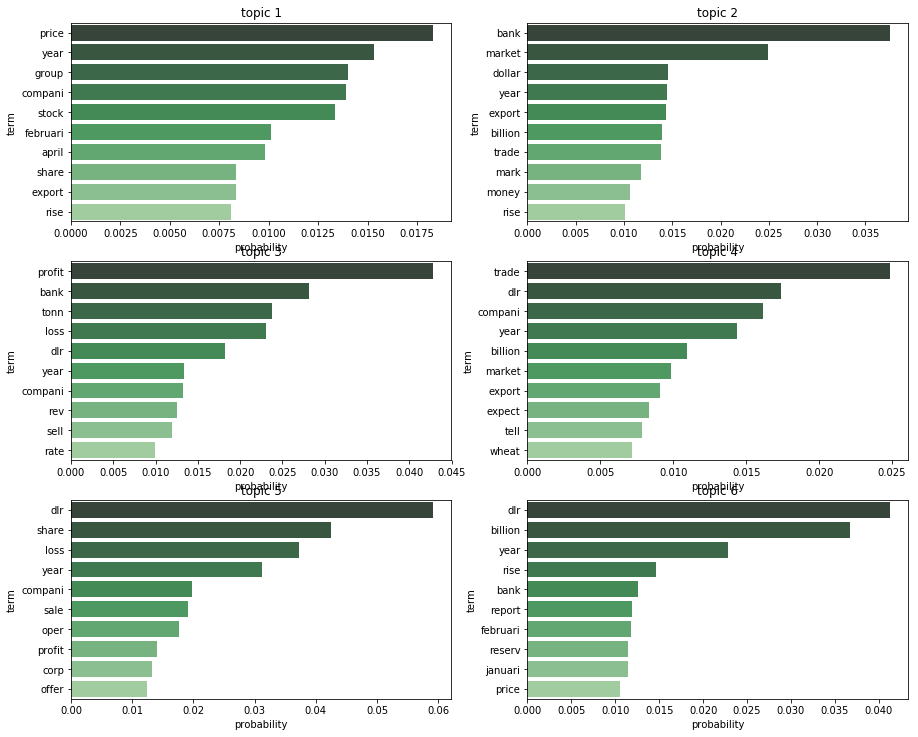

In [14]:
plt.figure(figsize=(15,2*15*((nt+1)/4))); #15
for i in range(nt):
    df=pd.DataFrame(lda_model.show_topic(i), columns=['term','prob']).set_index('term')
    plt.subplot(nt+1,2,i+1); #5
    plt.title('topic '+str(i+1));
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Greens_d');
    plt.xlabel('probability');